In [ ]:
# !pip install moviepy
# !pip install librosa

In [ ]:
# 동영상에서 오디오 추출
import moviepy.editor as mp

clip = mp.VideoFileClip('C:\\Users\\USER\\Downloads\\present.mp4')
clip.audio.write_audiofile('C:\\Users\\USER\\Downloads\\audio.wav')

[0.00145308 0.00162441 0.00137319 ... 0.         0.         0.        ]
(77633,)


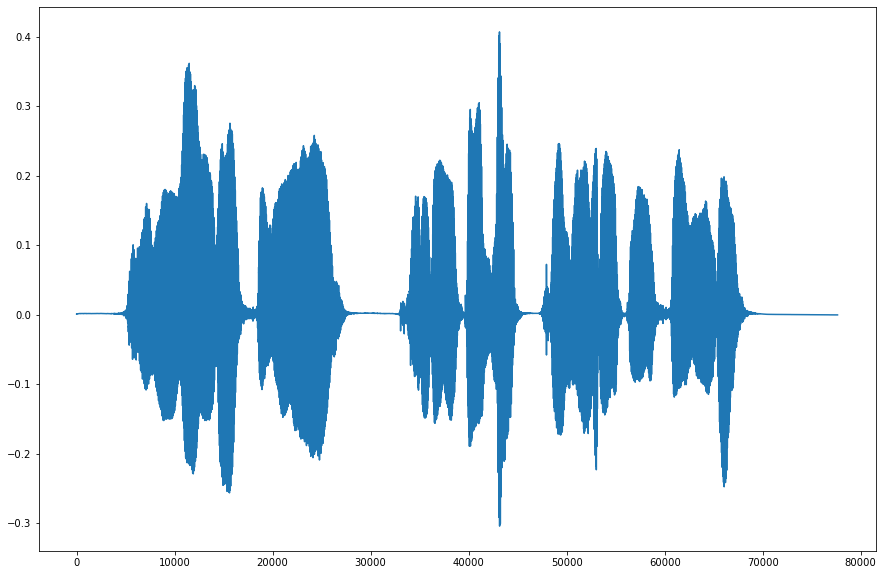

In [118]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd

audio_path = 'C:/Users/USER/Downloads/hello.wav'
sig, sr = librosa.load(audio_path)
print(sig)
print(sig.shape)

# df = pd.DataFrame(sig, columns=['a'])
# print(df[4825:4835])
# print(df[df['a']<0])

# stft_result = librosa.stft(sig, n_fft=4096, win_length = 4096, hop_length=1024)
# D = np.abs(stft_result)
# print(D)

# S = np.abs(librosa.stft(sig))
plt.figure(figsize=(15,10))
# librosa.display.waveplot(S, sr, alpha=0.5, x_axis='s')
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.title("Waveform")
plt.plot(sig)

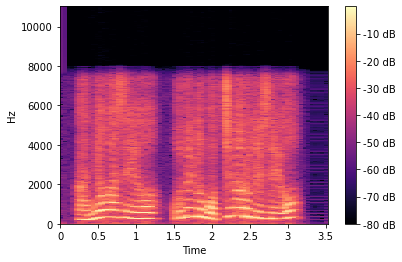

In [17]:
stft_result = librosa.stft(sig, n_fft=4096, win_length = 4096, hop_length=1024)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='linear', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()


fft start
fft end


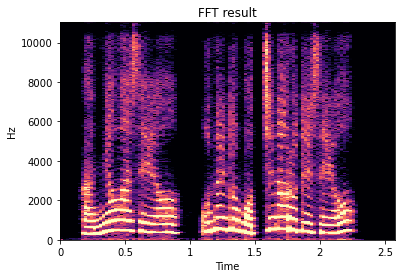

In [27]:
import scipy.signal as signal
import math
import librosa
import numpy as np

def wav_fft(file_name):
    print("fft start")
    audio_sample, sampling_rate = librosa.load(file_name, sr = None)        
    fft_result = librosa.stft(audio_sample, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann).T                    
    mag, phase = librosa.magphase(fft_result)                    
    print("fft end")
    return mag

#normalize_function
min_level_db = -100
def _normalize(S):
    return np.clip((S-min_level_db)/(-min_level_db), 0, 1)


mag = wav_fft('C:\\Users\\USER\\Downloads\\hello.wav')
mag_db = librosa.amplitude_to_db(mag)
mag_n = _normalize(mag_db)

import matplotlib.pyplot as plt
import librosa.display

librosa.display.specshow(mag_n.T, y_axis='linear', x_axis='time')
plt.title('FFT result')
plt.show()

No handles with labels found to put in legend.


16000
(56332,)


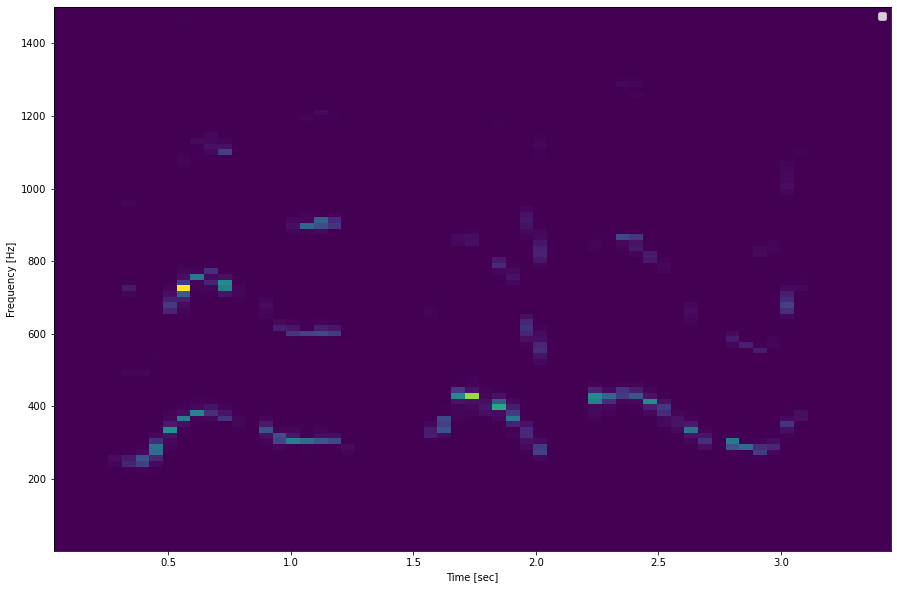

In [164]:
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

sample_rate, samples = wavfile.read('C:\\Users\\USER\\Downloads\\hello.wav')
print(sample_rate)
print(samples.shape)

# plt.plot(samples)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate, nfft=1024, nperseg=1024)
plt.figure(figsize=(15,10))
plt.pcolormesh(times, frequencies, spectrogram)
plt.ylabel('Frequency [Hz]')
plt.ylim(1,1500)
plt.xlabel('Time [sec]')
plt.show()